# Superstore Sales Dataset

#### Retail dataset of a global superstore for 4 years.

This data has been sourced from Kaggle: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from IPython.display import display_markdown
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
df.describe(include='O')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800
unique,4922,1230,1326,4,793,793,3,1,529,49,4,1861,3,17,1849
top,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,34,5859,35,35,5101,9800,891,1946,3140,19,5909,1492,47


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
for col in df.columns:
    print (df[col].value_counts())
    print ('=' * 40)

Row ID
1       1
6537    1
6530    1
6531    1
6532    1
       ..
3268    1
3269    1
3270    1
3271    1
9800    1
Name: count, Length: 9800, dtype: int64
Order ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: count, Length: 4922, dtype: int64
Order Date
05/09/2017    38
10/11/2017    35
02/12/2018    34
01/12/2018    34
02/09/2018    33
              ..
25/02/2017     1
25/10/2017     1
21/02/2015     1
11/09/2015     1
09/05/2016     1
Name: count, Length: 1230, dtype: int64
Ship Date
26/09/2018    34
06/12/2018    32
16/12/2016    31
15/09/2018    30
06/09/2018    30
              ..
10/07/2015     1
29/03/2016     1
14/06/2016     1
10/01/2018     1
13/05/2016     1
Name: count, Length: 1326, dtype: int64
Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day 

In [8]:
df.dropna(subset='Postal Code', inplace=True)

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month

## Data Analysis

I will begin my analysis by grouping by segment, region, category and ship mode, looking at both count and total sales.

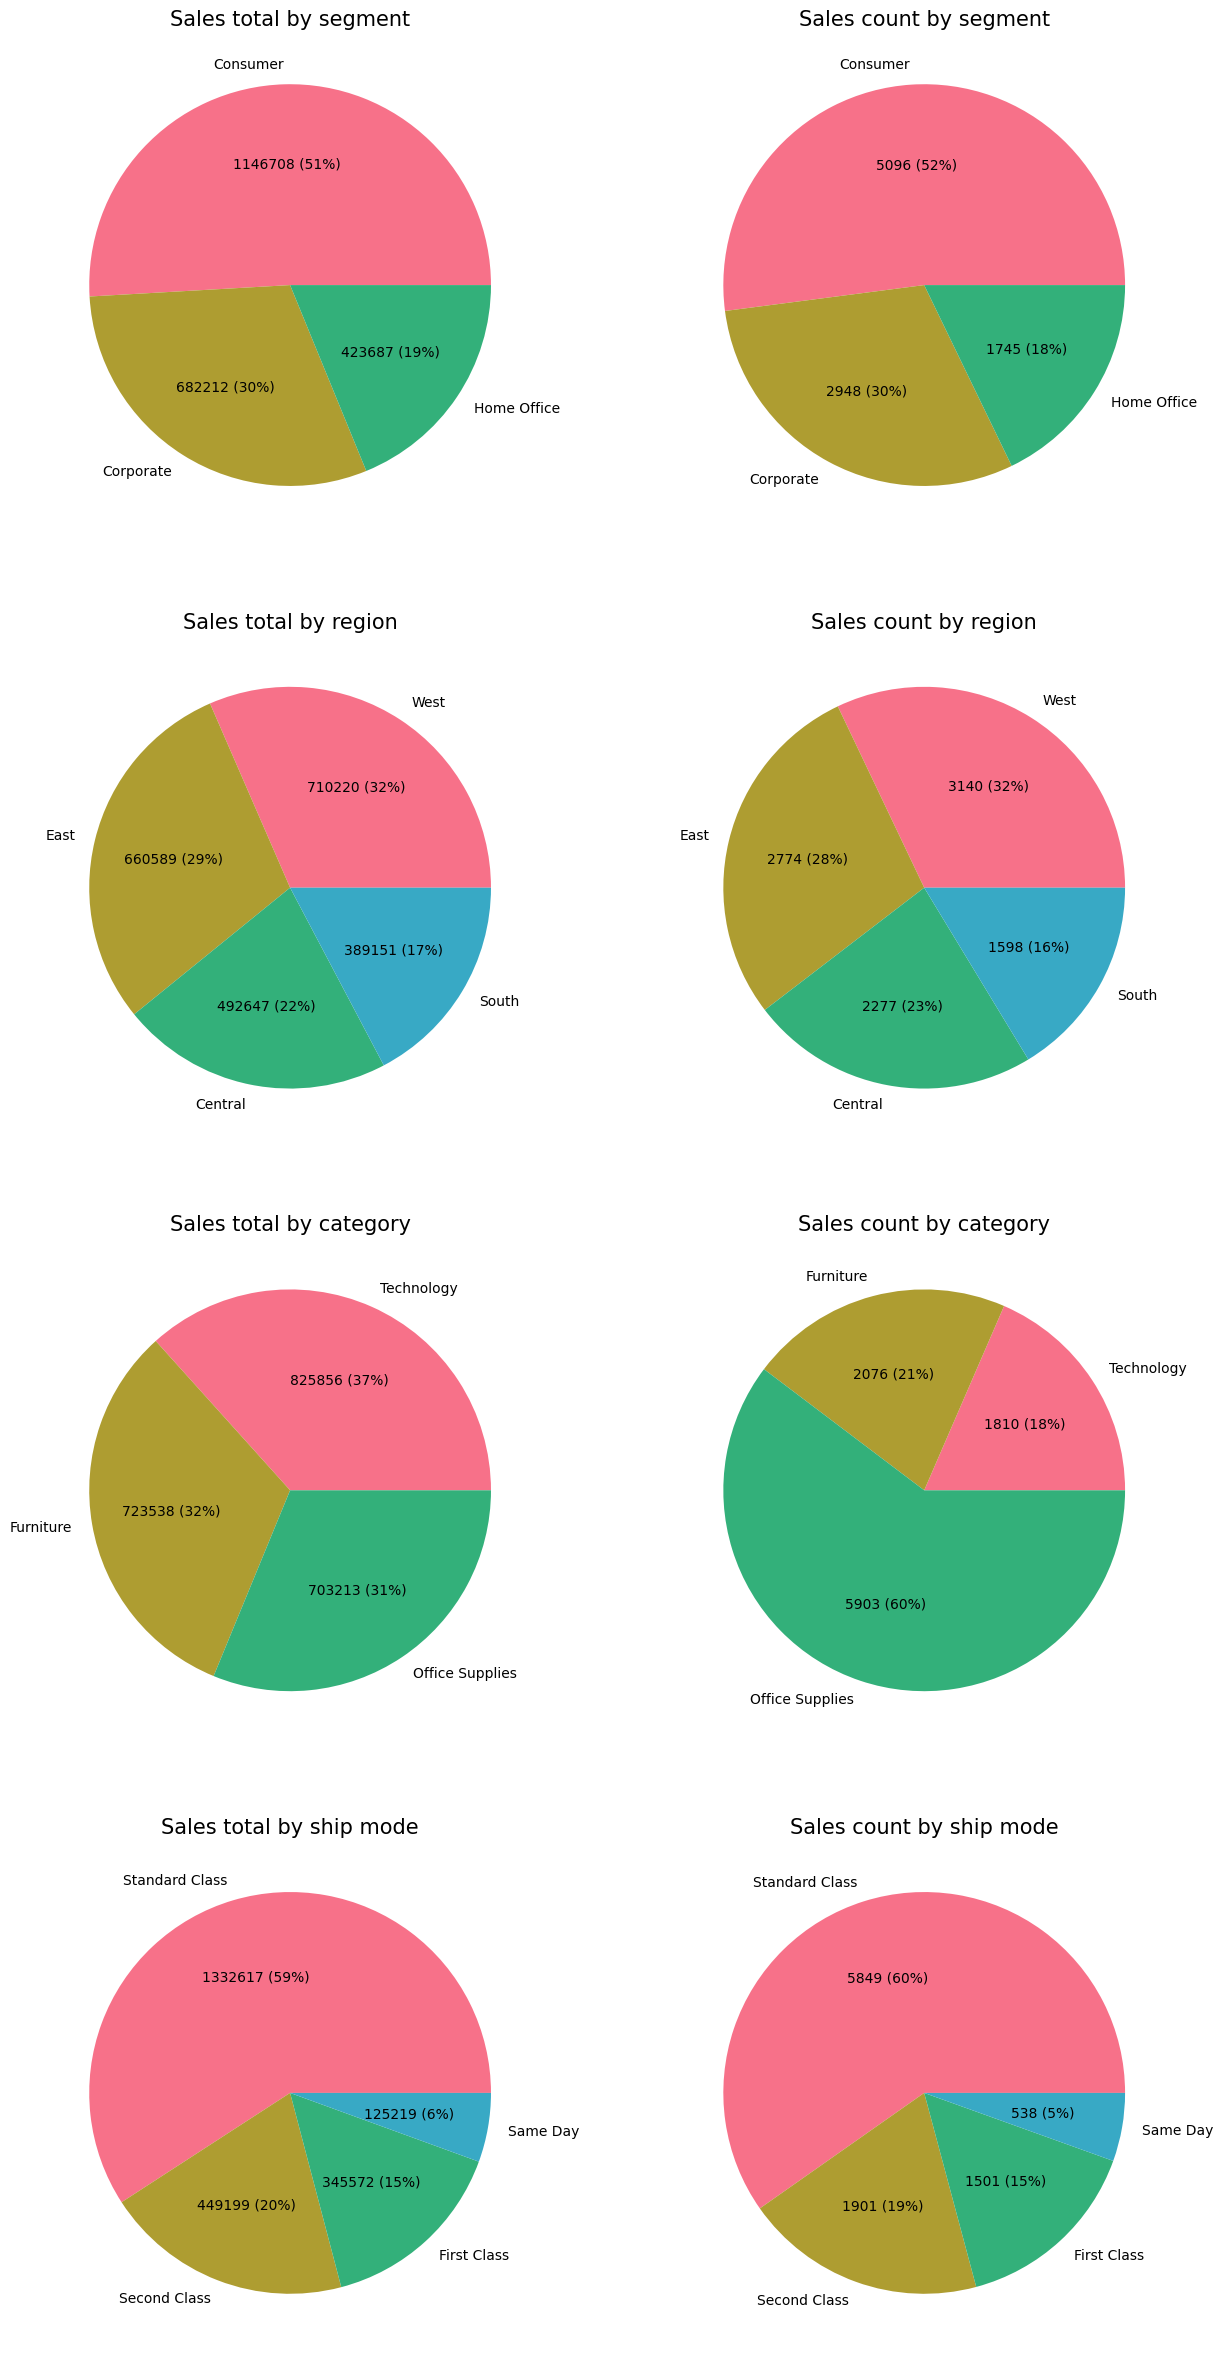

In [10]:
columns = ['Segment','Region','Category','Ship Mode']

fig, axes = plt.subplots(4,2, figsize=(15,30))
palette1 = sns.color_palette("husl", 5)

for i, column in enumerate(columns):
    df_pie = df[[column,'Sales']].groupby(by=column).agg(Total=('Sales', 'sum'), \
            Count=('Sales','size')).sort_values('Total', ascending=False)
    for j, val in enumerate(['Total','Count']):
        total = df_pie[val].values.sum()
        axes[i,j].pie(
            x=df_pie[val].values,
            labels=df_pie.index,
            colors=palette1,
            autopct= lambda p: f'{int((p * total)/100+0.5)} ({p:.0f}%)'
            )
        axes[i,j].set_title(f'Sales {val.lower()} by {column.lower()}', fontsize=15)
plt.show()

Perhaps the most useful insight here is that sales and count of category are noticeably different. In this case, it's clear that technological products are more expensive than office, with the latter making up the bulk of the orders by count, but not necessarily by sales. I will look into this further, by looking at the average price and histograms across these categories.

In [11]:
df_cat = df[['Category','Sales']].groupby(by='Category').mean().round(2)
df_cat

,Sales
Category,
Furniture,348.53
Office Supplies,119.13
Technology,456.27


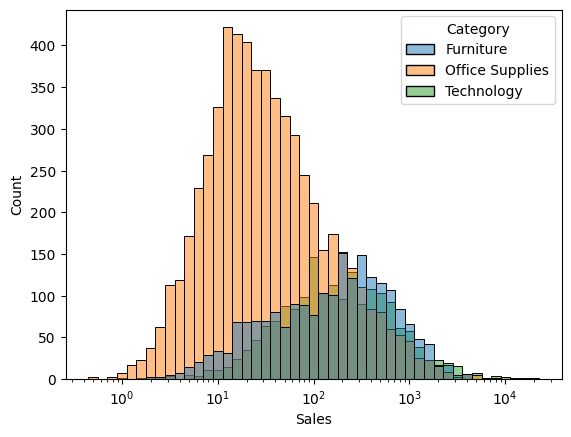

In [12]:
df_hist = df[['Category','Sales']]

fig, axes = plt.subplots()

sns.histplot(
    data=df_hist,
    x='Sales',
    hue='Category',
    log_scale = True,
    color=palette1
)

plt.show()

We can see from both analyses that the distribution of office product sales are much lower than those of furniture and technology products.

Next, I will look at total sales across the following categories: state, city, sub-category, product name and customer name.

In [49]:
def grapher(category):
    
    cats = ['Total','Count']

    fig, axes = plt.subplots(2,1, figsize=(8,12))

    for i, cat in enumerate(cats):
        
        df_subcat = df[[category,'Sales']].groupby(by=category).agg(Total=('Sales', 'sum'), \
                Count=('Sales','size')).sort_values(cat, ascending=False)
    
        sns.barplot(
            x=df_subcat.index[:20],
            hue=df_subcat.index[:20],
            y=cat,
            data=df_subcat[:20],
            ax = axes[i],
            palette='husl'
        )
        axes[i].set_xlabel(f'{category.lower().capitalize()}', fontsize=13)
        axes[i].set_ylabel(f'Sales {cat.lower()}', fontsize=13)
        axes[i].tick_params(axis='x', rotation=90)
        axes[i].set_title(f'Sales {cat.lower()} by {category.lower()}', y=1.03, fontsize=15)

    fig.tight_layout()
    plt.show()

### State

In [13]:
df_states = df[['State','Sales']].groupby(by='State').agg(Total=('Sales', 'sum'), \
                    Count=('Sales','size')).sort_values('Total', ascending=False)
total = df_states['Total'].sum()
df_states['Fraction'] = round((df_states['Total'] / total) * 100,0)
df_states['Cumulative'] = df_states['Fraction'].cumsum()


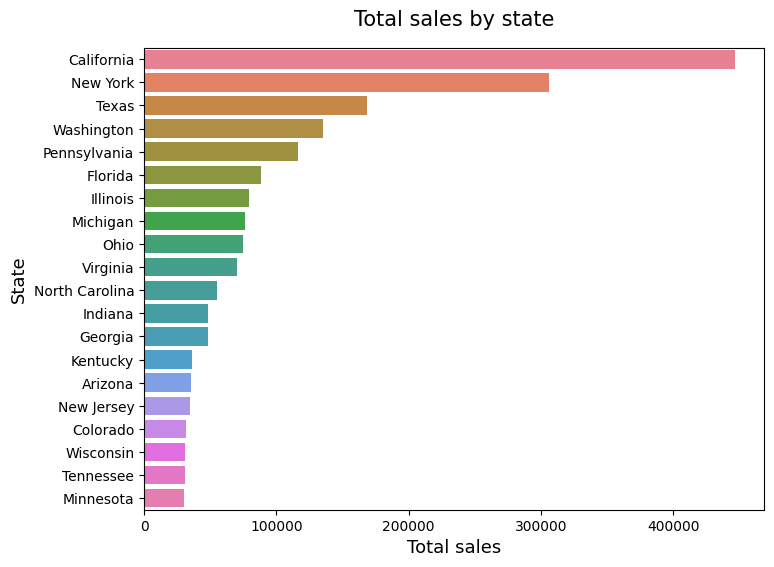

In [38]:
fig, axes = plt.subplots(figsize=(8,6))

sns.barplot(
    data=df_states[:20],
    y=df_states.index[:20],
    hue=df_states.index[:20],
    x='Total',
    palette='husl',
    legend=False
)

axes.set_xlabel(f'Total sales', fontsize=13)
axes.set_ylabel(f'State', fontsize=13)
axes.set_title(f'Total sales by state', y=1.03, fontsize=15)

plt.show()

### City

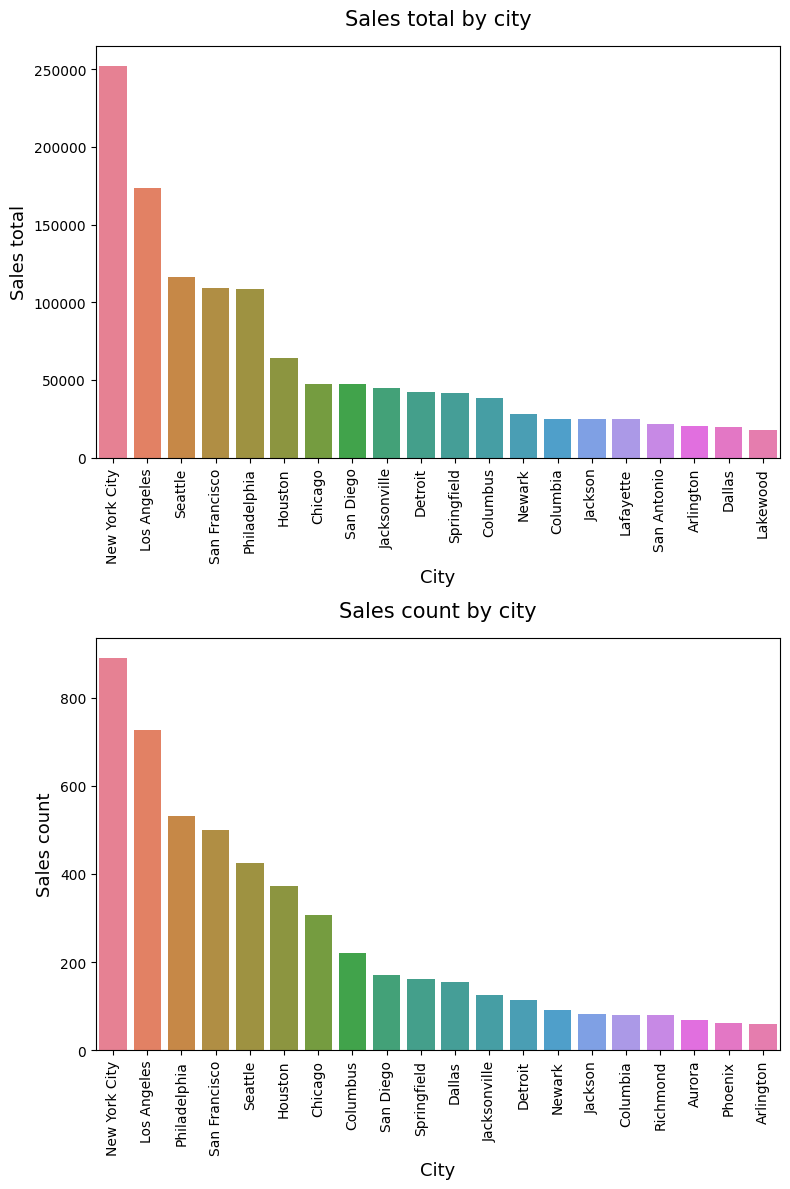

In [50]:
grapher('City')

### Sub-Category

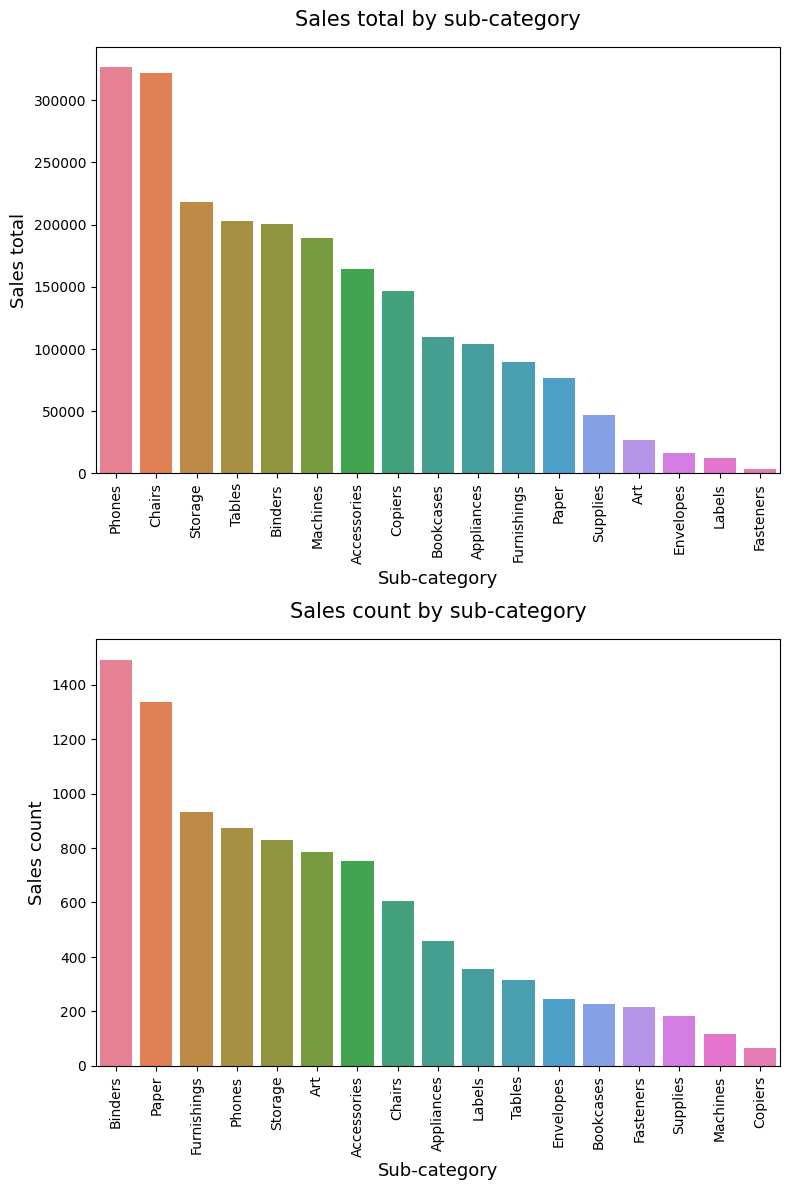

In [48]:
grapher('Sub-Category')

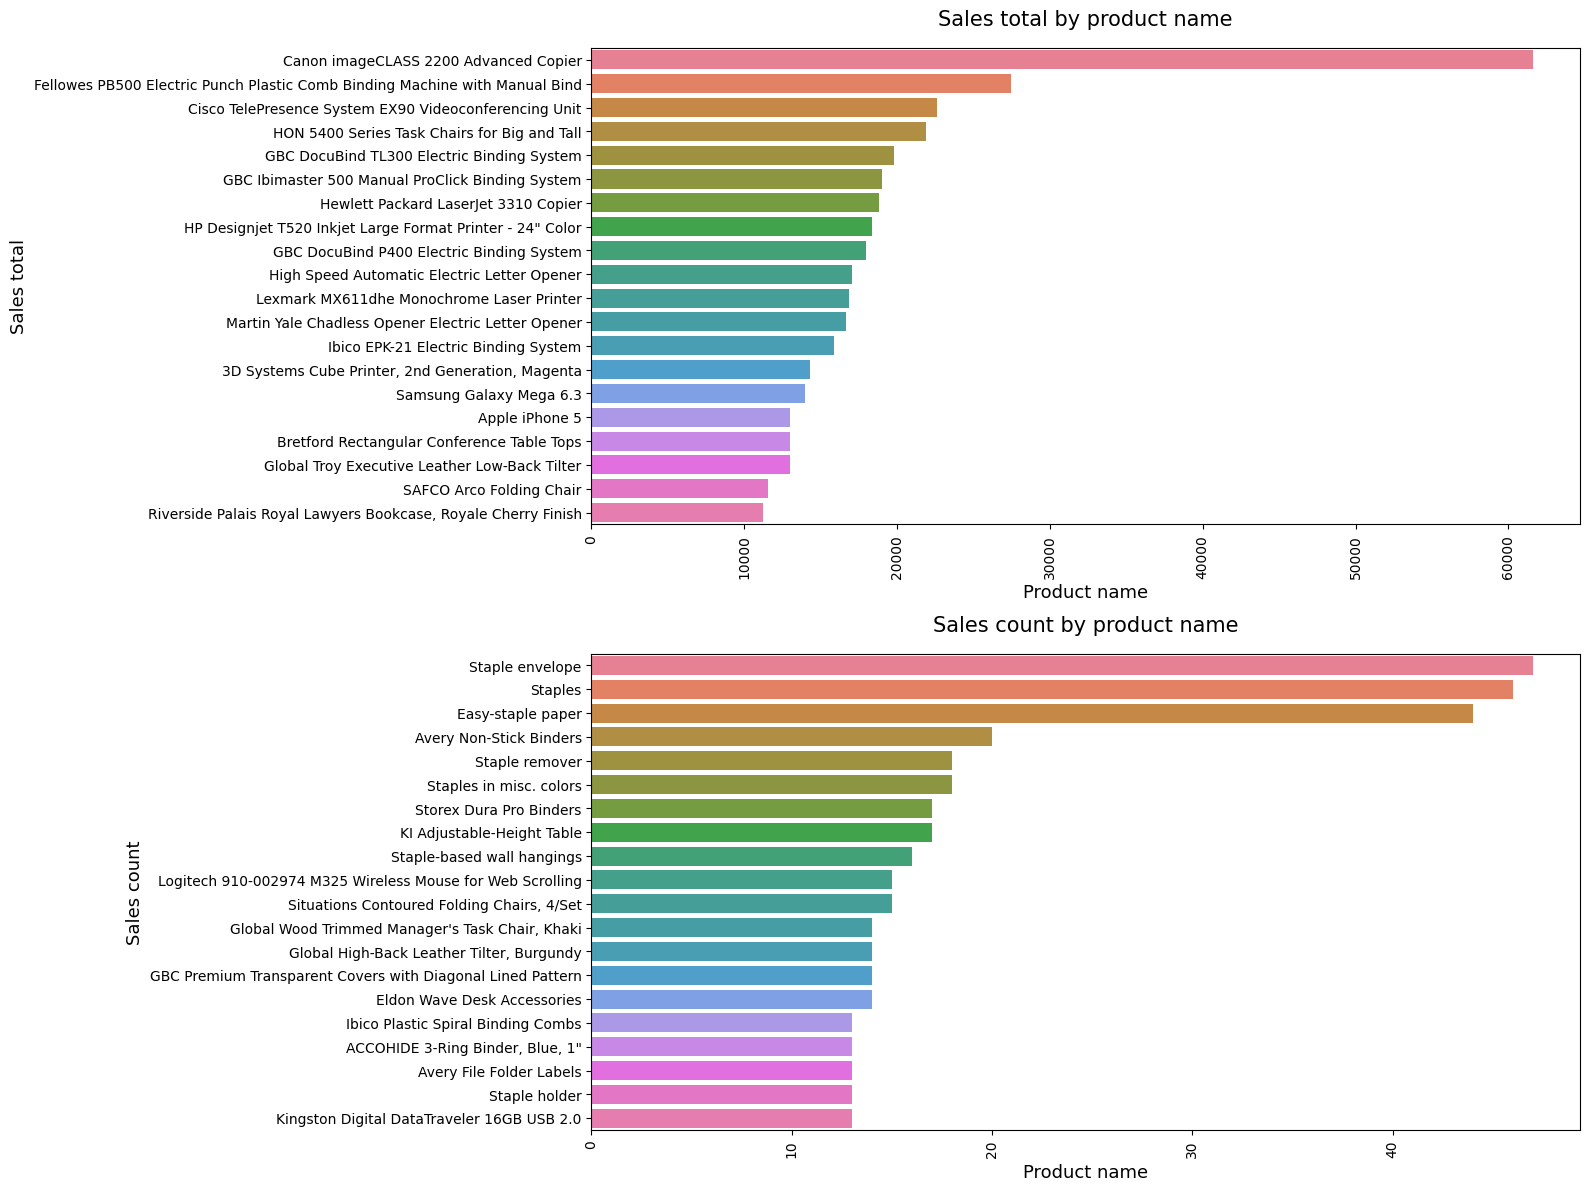

In [51]:
category = 'Product Name'

cats = ['Total','Count']

fig, axes = plt.subplots(2,1, figsize=(16,12))

for i, cat in enumerate(cats):

    df_subcat = df[[category,'Sales']].groupby(by=category).agg(Total=('Sales', 'sum'), \
            Count=('Sales','size')).sort_values(cat, ascending=False)

    sns.barplot(
        y=df_subcat.index[:20],
        hue=df_subcat.index[:20],
        x=cat,
        data=df_subcat[:20],
        ax = axes[i],
        palette='husl'
    )
    axes[i].set_xlabel(f'{category.lower().capitalize()}', fontsize=13)
    axes[i].set_ylabel(f'Sales {cat.lower()}', fontsize=13)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f'Sales {cat.lower()} by {category.lower()}', y=1.03, fontsize=15)

fig.tight_layout()
plt.show()

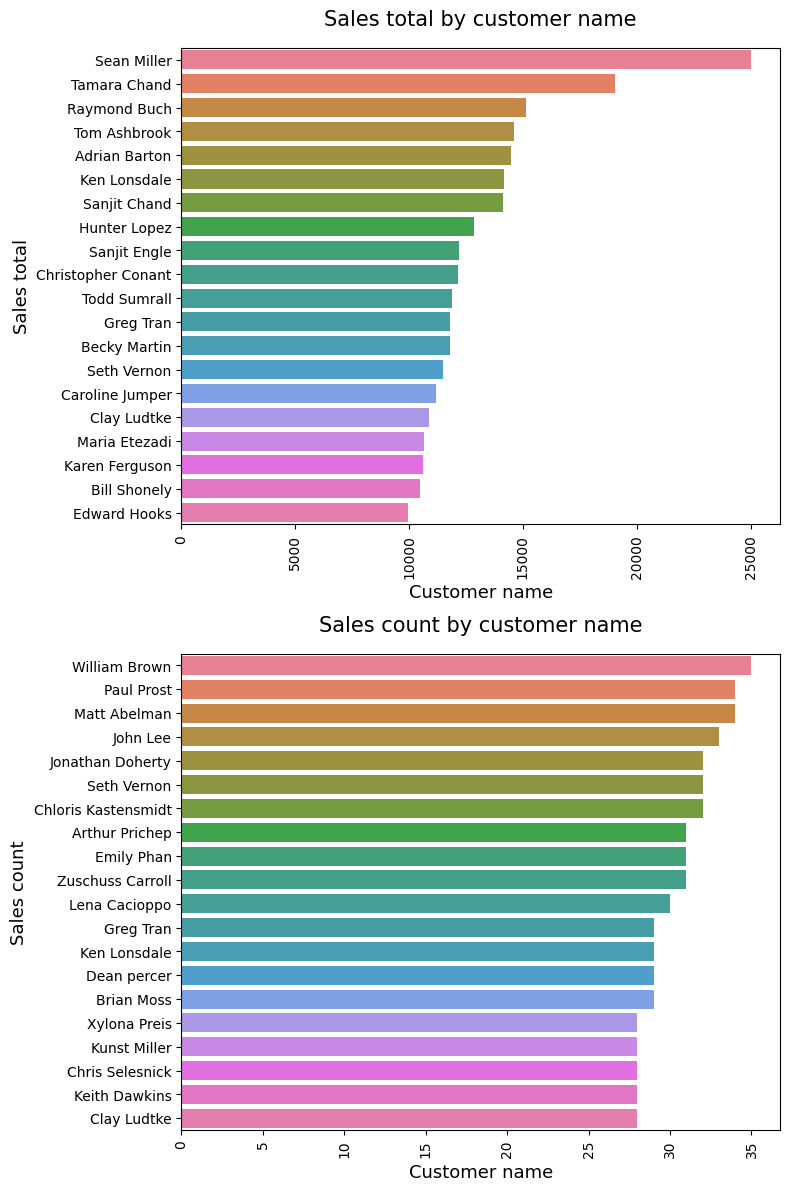

In [54]:
category = 'Customer Name'

cats = ['Total','Count']

fig, axes = plt.subplots(2,1, figsize=(8,12))

for i, cat in enumerate(cats):

    df_subcat = df[[category,'Sales']].groupby(by=category).agg(Total=('Sales', 'sum'), \
        Count=('Sales','size')).sort_values(cat, ascending=False)

    sns.barplot(
        y=df_subcat.index[:20],
        hue=df_subcat.index[:20],
        x=cat,
        data=df_subcat[:20],
        ax = axes[i],
        palette='husl'
    )
    axes[i].set_xlabel(f'{category.lower().capitalize()}', fontsize=13)
    axes[i].set_ylabel(f'Sales {cat.lower()}', fontsize=13)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_title(f'Sales {cat.lower()} by {category.lower()}', y=1.03, fontsize=15)

fig.tight_layout()
plt.show()

### Time series analysis

Next, I will look at how sales vary over time.

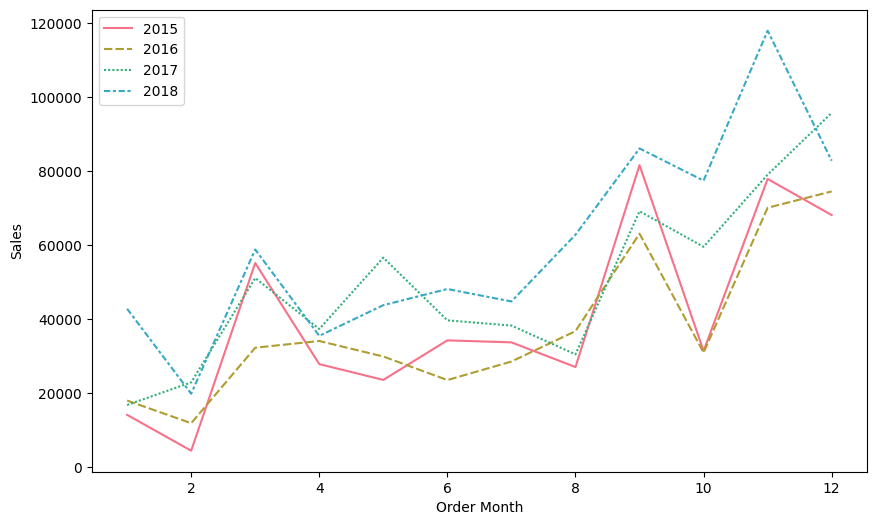

In [19]:
df_time = df[['Order Year','Order Month','Sales']].groupby(by=['Order Year','Order Month']).sum()
fig, axes = plt.subplots(figsize=(10,6))

sns.lineplot(
    data=df_time,
    x='Order Month',
    y='Sales',
    hue='Order Year',
    style='Order Year',
    palette=palette1[:4]
    )

plt.legend()
plt.show()

We can see above that, in general, more sales occur towards the end of the year. This is possibly due to spending budget around the end/start of the US financial year (September/October)

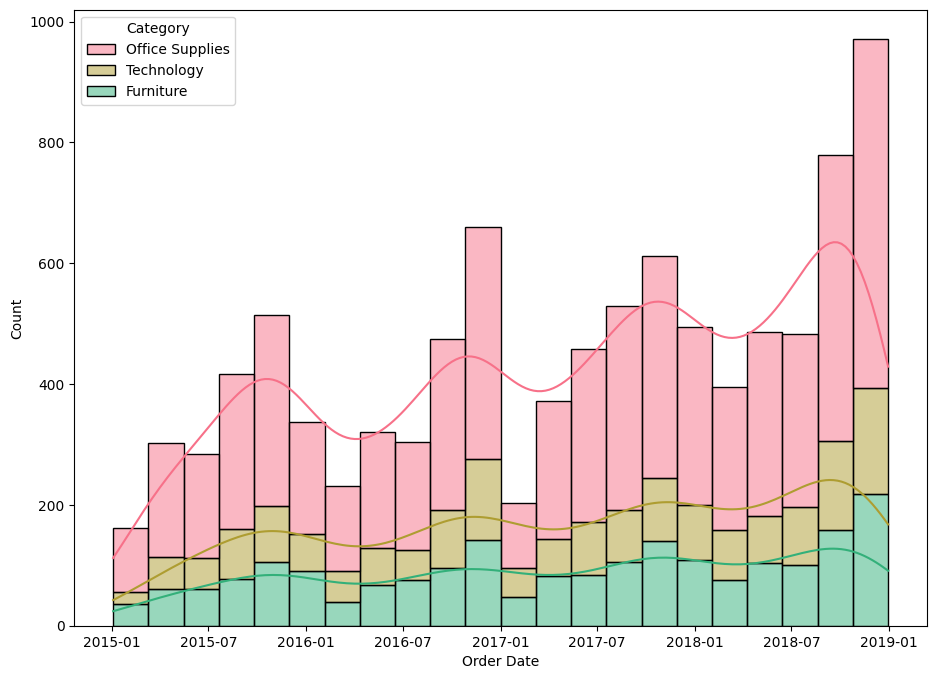

In [18]:
fig, axes = plt.subplots(figsize=(11,8))

sns.histplot(
    data=df,
    x='Order Date',
    kde=True,
    hue='Category',
    multiple='stack',
    ax=axes,
    hue_order = ['Office Supplies','Technology','Furniture'],
    palette=palette1[:3]
)

plt.show()

We can see that office supplies are the most purchased items, and that this generally increases across the 4 years of data.

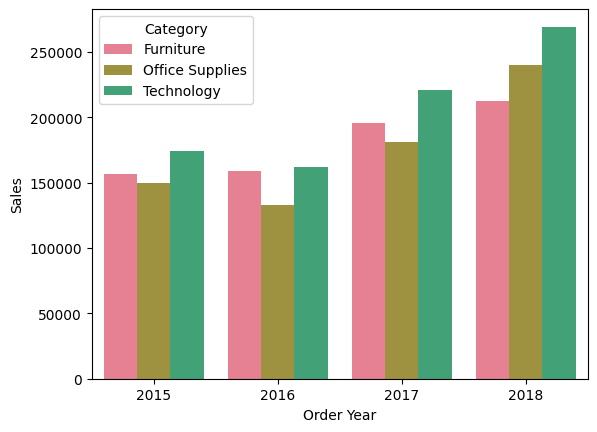

In [55]:
df_year = df[['Order Year','Category','Sales']].groupby(by=['Order Year','Category']).sum().reset_index()

fig, axes = plt.subplots()

sns.barplot(
    data=df_year,
    x='Order Year',
    y='Sales',
    hue='Category',
    palette=palette1[:3]
)

plt.show()

We can see a similar trend if we look at total sales across categories rather than just count (as expected from the earlier pie charts).

I thought it might be useful to look at the trend in products across the top 50% of sales by state. In this example, the top 5 states represent just over 50% of the total sales for the superstore.

In [171]:
top50p = []
for i in range(0,len(df_states)):
    if df_states.iloc[i,3] < 50:
        top50p.append(df_states.index[i])
    else:
        top50p.append(df_states.index[i])
        break

top50p

df_top = df[df['State'].isin(top50p)]

In [172]:
data_states = pd.DataFrame

for state in top50p:
    df_state = df_top[df_top['State'] == state]
    df_state2 = df_state[['Order Year','Sub-Category','Sales']].groupby(by=['Order Year','Sub-Category']).agg(\
                                                            Total=('Sales','sum')).unstack('Sub-Category')
    df_state2.columns = df_state2.columns.droplevel([0])
    df_state2.fillna(0, inplace=True)
    setattr(data_states,state,df_state2)

In [178]:
from bokeh.models.widgets import Tabs, Panel
from bokeh.plotting import figure, output_notebook, show, save
from bokeh.models import ColumnDataSource, HoverTool, GroupFilter, CDSView
import bokeh.palettes
from bokeh.resources import INLINE

output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')

cali = data_states.California.plot(show_figure=False, colormap='Category20')
newyork = getattr(data_states,'New York').plot(show_figure=False, colormap='Category20')
texas = data_states.Texas.plot(show_figure=False, colormap='Category20')
wash = data_states.Washington.plot(show_figure=False, colormap='Category20')
penn = data_states.Pennsylvania.plot(show_figure=False, colormap='Category20')

for state in [cali,newyork,texas,wash,penn]:
    setattr(state,'plot_width',750)
    setattr(state,'plot_height',600)

Californiapanel = Panel(child=cali, title='California')
Newyorkpanel = Panel(child=newyork, title='New York')
Texaspanel = Panel(child=texas, title='Texas')
Washingtonpanel = Panel(child=wash, title='Washington')
Pennsylvaniapanel = Panel(child=penn, title='Pennsylvania')


combined = Tabs(tabs=[Californiapanel,Newyorkpanel,Texaspanel,Washingtonpanel,Pennsylvaniapanel])
combined.width=1000
show(combined)

Loading BokehJS ...

We can see that phones, chairs, binders and copiers are heavily purchased across these 5 states.

### Conclusions

1) We can see that the top 5 states contribute to over 50% of the total sales for this store.
2) Sales are split evenly across the three categories: tech, office, furntiture.
3) Office supplies are the most purchased categories, but are generally cheaper then furniture and technology.
4) More purchases are made around the end/start of the US financial year.
5) Total sales generally increased from year to year (inflation should be taken into consideration here).
6) Phones, chairs, binders and copiers contribute largely to sales both generally and across the top 5 states.